In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
faces_zip = "/content/drive/MyDrive/Face.zip"
nonfaces_zip = "/content/drive/MyDrive/Nonhuman_objects.zip"

!mkdir -p /content/dataset/face
!mkdir -p /content/dataset/nonface

!unzip -qo $faces_zip -d /content/dataset/face
!unzip -qo $nonfaces_zip -d /content/dataset/nonface


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [5]:
import os, shutil
import numpy as np

In [6]:
def split_dataset(src_dir, dst_root, class_name, split=(0.7,0.2,0.1)):
    files = os.listdir(src_dir)
    np.random.shuffle(files)

    n_total = len(files)
    n_train = int(split[0] * n_total)
    n_val = int(split[1] * n_total)

    train_files = files[:n_train]
    val_files = files[n_train:n_train+n_val]
    test_files = files[n_train+n_val:]

    for subdir in ["train", "val", "test"]:
        os.makedirs(os.path.join(dst_root, subdir, class_name), exist_ok=True)

    for f in train_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(dst_root, "train", class_name, f))
    for f in val_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(dst_root, "val", class_name, f))
    for f in test_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(dst_root, "test", class_name, f))


In [7]:
split_dataset("/content/dataset/face", "/content/dataset_ready", "face")
split_dataset("/content/dataset/nonface", "/content/dataset_ready", "nonface")


In [8]:
import os
from PIL import Image

data_dir = "/content/dataset_ready"
max_size = (1280, 1280)

def resize_big_images(data_dir, max_size=(1280,1280)):
    for root, dirs, files in os.walk(data_dir):
        for f in files:
            path = os.path.join(root, f)
            try:
                img = Image.open(path)
                if img.size[0] * img.size[1] > 8947848:
                    print(f"Resizing {path} from {img.size}...")
                    img.thumbnail(max_size, Image.Resampling.LANCZOS)
                    img.save(path)
            except Exception as e:
                print(f"Ошибка с {path}: {e}")

resize_big_images(data_dir, max_size=(1280,1280))


Resizing /content/dataset_ready/val/face/setengah-limasore-uM-mH5AiVr4-unsplash.jpg from (6000, 3376)...
Resizing /content/dataset_ready/val/face/g-t-ULMYDetnuIM-unsplash.jpg from (2560, 3840)...
Resizing /content/dataset_ready/val/face/pacha-shot-s-d0peGya6R5Y-unsplash.jpg from (2848, 4207)...
Resizing /content/dataset_ready/val/face/setengah-limasore-yYwExizuTaE-unsplash.jpg from (3376, 6000)...
Resizing /content/dataset_ready/val/face/setengah-limasore-xXEZqjRnUp0-unsplash.jpg from (3376, 6000)...
Resizing /content/dataset_ready/val/face/quan-you-zhang-xymDq5hjWpM-unsplash.jpg from (3302, 4953)...
Resizing /content/dataset_ready/val/face/scott-butcher-frANbBmqWJg-unsplash.jpg from (5999, 9000)...
Resizing /content/dataset_ready/val/face/mathew-schwartz-WpNfKGZDZEw-unsplash.jpg from (3252, 3252)...
Resizing /content/dataset_ready/val/face/setengah-limasore-T1qroWVyojU-unsplash.jpg from (3376, 6000)...
Resizing /content/dataset_ready/val/face/setengah-limasore-fFN6WlyaAY0-unsplash.jpg

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (119997141 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Resizing /content/dataset_ready/train/face/ospan-ali-ivIq7icbnnM-unsplash.jpg from (8949, 13409)...
Resizing /content/dataset_ready/train/face/imansyah-muhamad-putera-n4KewLKFOZw-unsplash.jpg from (3456, 3456)...
Resizing /content/dataset_ready/train/face/alex-zeng-SPE-PolG3ZI-unsplash.jpg from (3024, 4032)...
Resizing /content/dataset_ready/train/face/rohit-sharma-9j0s6-j9xtI-unsplash.jpg from (3999, 5000)...
Resizing /content/dataset_ready/train/face/tommao-wang-kpVUX-s_93o-unsplash.jpg from (3968, 5952)...
Resizing /content/dataset_ready/train/face/albert-dera-ILip77SbmOE-unsplash.jpg from (3744, 5616)...
Resizing /content/dataset_ready/train/face/metin-ozer-iSmTwuKTNDo-unsplash.jpg from (3456, 5184)...
Resizing /content/dataset_ready/train/face/michael-starkie-f9vI_Jo7_4w-unsplash.jpg from (3279, 4919)...
Resizing /content/dataset_ready/train/face/nrd-ZmmAnliy1d4-unsplash.jpg from (3456, 4608)...
Resizing /content/dataset_ready/train/face/ehsan-ahmadi-vsWy6nchcOs-unsplash.jpg from 

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 157MB/s]


Person detected: 1 (threshold=0.5)


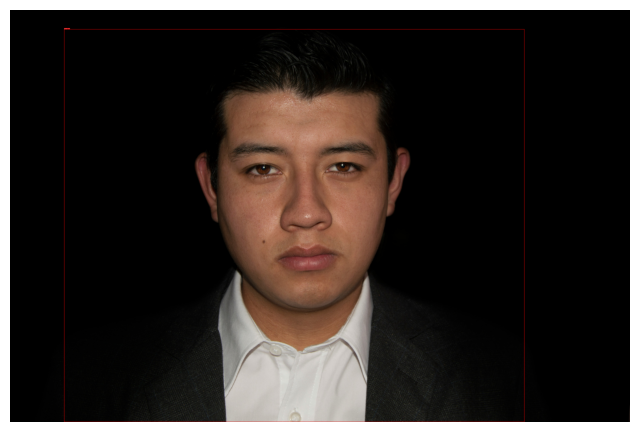

In [9]:
"""
Person detector Jupyter Notebook version using PyTorch torchvision Faster R-CNN pretrained on COCO.

Как использовать:
 1) Установите зависимости:
    pip install torch torchvision pillow opencv-python

 2) Откройте notebook и запустите ячейки.

Скрипт возвращает: "Person detected" или "No person detected" и показывает аннотированное изображение.
"""

import torch
import torchvision
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

COCO_PERSON_LABEL = 1  # в COCO dataset class 1 = person

# Загружаем модель
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model.to(device)


def predict_image(model, device, image_path, score_threshold=0.5):
    img = Image.open(image_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    tensor = transform(img).to(device)

    with torch.no_grad():
        outputs = model([tensor])

    outputs = outputs[0]
    boxes = outputs['boxes'].cpu()
    labels = outputs['labels'].cpu()
    scores = outputs['scores'].cpu()

    # Отфильтровать по метке person и порогу
    person_indices = [i for i, lbl in enumerate(labels) if lbl.item() == COCO_PERSON_LABEL and scores[i].item() >= score_threshold]

    persons = []
    for i in person_indices:
        box = boxes[i].tolist()  # [x1, y1, x2, y2]
        score = float(scores[i].item())
        persons.append({'box': box, 'score': score})

    return img, persons


def draw_boxes(image, persons):
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.load_default()
    except Exception:
        font = None

    for p in persons:
        x1, y1, x2, y2 = p['box']
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        label = f"person: {p['score']:.2f}"

        # Вместо textsize используем textbbox
        if font:
            bbox = draw.textbbox((x1, y1), label, font=font)
            text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]
        else:
            text_w, text_h = 50, 10  # fallback значения

        draw.rectangle([x1, y1 - text_h, x1 + text_w, y1], fill="red")
        draw.text((x1, y1 - text_h), label, fill="white", font=font)
    return image


def process_image(image_path, thr=0.5):
    img, persons = predict_image(model, device, image_path, thr)
    if persons:
        print(f"Person detected: {len(persons)} (threshold={thr})")
    else:
        print(f"No person detected (threshold={thr})")

    annotated = draw_boxes(img.copy(), persons)
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated)
    plt.axis("off")
    plt.show()

# Пример использования:
process_image("/content/dataset/face/abdiel-cortes-xvPRvLU7HnU-unsplash.jpg", thr=0.5)
